# Root Finding

### Table of Contents:

1. [Fixed-point iteration](#first-bullet)
2. [Newton's method](#second-bullet)
3. [Secant method](#third-bullet)
4. [Characteristics](#fourth-bullet)
5. [Implementation and comparison](#fifth-bullet)


---

## 1. Fixed-point iteration <a class="anchor" id="first-bullet"></a>

Suppose we define an iteration

$$
x_{k+1} = g(x_k)
$$

If $\alpha$ is a point such that $g(\alpha) = \alpha$, we call $\alpha$ a fixed point of $g$.

A fixed-point iteration terminates once a fixed point is reached, since if $g(x_k)= x_k$ then we get $x_{k+1} = x_k$.

Also, if $x_{k+1}$ converges as $k \rightarrow \infty$, it must converge to a fixed point: Let $\alpha = \lim_{k \rightarrow \infty} x_k$, then

$$
\alpha = \lim_{k \rightarrow \infty} x_{k+1} = \lim_{k \rightarrow \infty} g(x_k) = g\left(\lim_{k \rightarrow \infty} x_k\right) = g(\alpha)
$$

Hence, we need to guarantee that a fixed-point iteration will converge.


---

We can use **Lipschitz condition** to prove that the fixed point iteration converges to $\alpha$.

If $g $ satisfies a Lipschitz condition in an interval $[a,b]$ if $\exists L \in \mathbb{R}_{>0}$ such that

$$
|g(x) - g(y)| \leq L |x-y|, \quad \forall x,y \in [a,b]
$$

$g$ is called a **contraction** if $L < 1$. Simply speaking, contraction takes two numbers and maps them close to each other.

$$
|x_k - \alpha| = |g(x_{k-1}) - g(\alpha)| \leq L|x_{k-1} - \alpha| 
$$

which implies 

$$
|x_k - \alpha| \leq L^k |x_0 - \alpha|
$$

and since $L < 1$, $|x_k - \alpha| \rightarrow 0$ as $k \rightarrow \infty$. This shows that error decreases by factor of $L$ each iteration.

Therefore, we define the rule of convergence of fixed-point iteration:

> Suppose that $g(\alpha) = \alpha$ and that $g$ is a contraction on $[\alpha - A, \alpha + A]$. Suppose also that $|x_0 - \alpha| \leq A$. Then the fixed point iteration converges to $\alpha$.

---

We can verify convergence of a fixed-point iteration by checking the gradient of $g$, since if $g \in C^1[a,b]$, we can obtain a Lipschitz constant based on $g'$:

$$
L = \max_{\theta \in (a,b)} |g'(\theta)|
$$

We want to check if $|g'(\alpha)|<1$, i.e. if there is a neighborhood of $\alpha$ on which $g$ is a contraction.

Furthermore, as $k \rightarrow \infty$,

$$
{|x_{k+1} - \alpha| \over |x_k - \alpha|} = {| g(x_k) - g(\alpha)| \over |x_k - \alpha|} \rightarrow |g'(\alpha)|
$$

Hence, asymptotically, error decreases by a factor of $|g'(\alpha)|$ each iteration.

$|g'(\alpha)|$ can be used to dictate the **asymptotic convergence rate**:

We say an iteration converges **linearly** if, for some $\mu \in (0,1)$,

$$
\lim_{k \rightarrow \infty} {|x_{k+1} - \alpha| \over |x_k - \alpha|} = \mu
$$

An iteration converges **superlinearly** if 

$$
\lim_{k \rightarrow \infty} {|x_{k+1} - \alpha| \over |x_k - \alpha|} = 0
$$

---

## 2. Newton's method <a class="anchor" id="first-bullet"></a>

Consider the following fixed-point iteration

$$
x_{k+1} = x_k - \lambda(x_k)f(x_k), \quad k = 0,1,2,...
$$

corresponding to $g(x) = x - \lambda(x_k) f(x_k)$, for some function $\lambda$.

We want to achieve a fixed point $\alpha$ of $g$ such that $f(\alpha) = 0$, and we also want $|g'(\alpha)| = 0$ t get superlinear convergence.

We take the first derivative and evaluate it at $f(\alpha) = 0$:

$$
g'(\alpha) = 1 - \lambda'(\alpha) f(\alpha) - \lambda(\alpha) f'(\alpha) = 1 - \lambda(\alpha) f'(\alpha)
$$

To satisfy $|g'(\alpha)| = 0$ we choose $\lambda(x) = 1/f'(x)$ to get **Newton's Method**:

$$
x_{k+1} = x_k - {f(x_k)\over f'(x_k)}, \quad k = 0,1,2,...
$$

---

To understand the superlinear convergence rate of Newton's Method, we apply **Taylor expansion** for $f(\alpha)$ about $f(x_k)$:

$$
0 = f(\alpha) = f(x_k) + (\alpha - x_k) f'(x_k) + {(\alpha - x_k)^2 \over 2} f''(\theta_k)
$$

for some $\theta_k \in (\alpha , x_k)$. 

Dividing through by $f'(x_k)$ gives

$$
\left(x_{k+1} - {f(x_k)\over f'(x_k)}\right) - \alpha = {f''(\theta_k)\over 2f'(x_k)} (x_k - \alpha)^2
$$

equivalently,

$$
x_{k+1} - \alpha = {f''(\theta_k)\over 2f'(x_k)} (x_k - \alpha)^2
$$

Hence, the error at iteration $k+1$ is the square of the error at each iteration $k$. This refers to as **quadratic convergence**. 

Note that this result relies on the second order Taylor expansion near $\alpha$, we need to be **sufficiently close** to $\alpha$ to get quadratic convergence.

---

## 3. Secant method <a class="anchor" id="first-bullet"></a>


Secant method uses finite difference to approximate $f'(x_k)$:

$$
f'(x_k) \approx {f(x_k) - f(x_{k-1}) \over x_k - x_{k-1}}
$$

Substituting this into the iteration leads to **Secant Method**:

$$
x_{k+1} = x_k - f(x_k)\left({x_k - x_{k-1}\over f(x_k) - f(x_{k-1})}\right), \quad k = 1,2,3...
$$



The convergence rate fo Secant Method can be shown as

$$
\lim_{k \rightarrow \infty} {|x_{k+1} - \alpha| \over |x_k - \alpha|^q} = \mu
$$

where $\mu$ is a positive constant and $q$ is the golden ratio $q = {1+ \sqrt{5} \over 2} \approx 1.6$.

Thus, Secant Method has a **golden ratio quadratic rate** of convergence.

---

## 4. Characteristics <a class="anchor" id="fourth-bullet"></a>

* **Fixed-point iteration**

    * Sometimes need to re-write the function $f(x)=0$ as $x = g(x)$ to make sure $g(x)$ has an appropriate property.
    
* **Newton's Method**

    * Quadratic convergence is very rapic.
    * Requires to evaluate both $f(x_k)$ and $f'(x_k)$ per iteration.
    
* **Secant Method**

    * Faster than fixted-point iteration, slower than Newton's Method.
    * Does not require us to determine $f'(x)$ analytically.
    * Requires only one extra function evaluation, $f(x_k)$, per iteration.
    * When iterations become so close, we might get division by 0.
    

---

## 5. Implementation and comparison <a class="anchor" id="fifth-bullet"></a>

The following section compares how fixed-point interation, Newton's method and Secant method solve $f(x) = e^x - x -2 = 0$.

In [1]:
from math import *

# f(x) = e^x-x-2
def f(x):
    return exp(x)-x-2

# f'(x) = e^x-1
def df(x):
    return exp(x)-1

startpt = 2

# Newton method setup
xa=startpt

# Secant method setup
xb=startpt

# Fixed-point iteration setup
xc=startpt

# Initialize previous step x_{k-1} in secant method
xbb=startpt + 0.1
fxbb=f(xbb)

# store
xas = [xa]
xbs = [xb]
xcs = [xc]

for k in range(30):

    print("%17.10g %17.10g %17.10g %17.10g %17.10g %17.10g" \
          %(xa,f(xa),xb,f(xb),xc,f(xc)))

    # Newton
    xa=xa-f(xa)/df(xa)
    xas.append(xa)
    
    # Secant
    fxb=f(xb)
    tem=xb-fxb*(xb-xbb)/(fxb-fxbb)
    xbb=xb;fxbb=fxb
    xb=tem
    xbs.append(xb)
    
    # Fixed point iteration
    xc=log(xc+2)
    xcs.append(xc)
    
    if xb-xbb == 0.0 and fxb-fxbb == 0.0:
        break

                2       3.389056099                 2       3.389056099                 2       3.389056099
      1.469552928      0.8777382272       1.499485016      0.9798966489       1.386294361      0.6137056389
      1.207329481      0.1372115734       1.295906562      0.3584007663       1.219736215      0.1665581464
      1.148805629    0.005617477688       1.178508079      0.0710144738       1.169299435      0.0504367794
      1.146198212   1.071354715e-05       1.149498374    0.007110700897       1.153510565     0.01578887016
      1.146193221   3.919975455e-11       1.146270406   0.0001656637239       1.148516297    0.004994267732
      1.146193221                 0       1.146193407   4.007691814e-07       1.146931325    0.001584972228
      1.146193221                 0       1.146193221   2.267208643e-11       1.146427796   0.0005035296475
      1.146193221                 0       1.146193221                 0       1.146267776   0.0001600193597


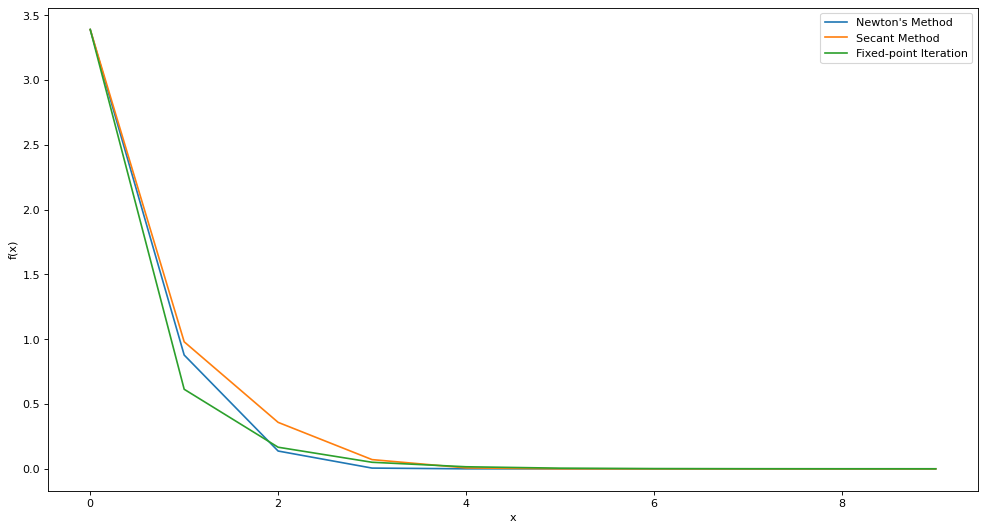

In [2]:
import matplotlib.pyplot as plt
import numpy as np

domain = np.arange(0,len(xas), 1)
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(domain,[f(x) for x in xas], label = "Newton's Method")
plt.plot(domain,[f(x) for x in xbs], label = "Secant Method")
plt.plot(domain,[f(x) for x in xcs], label = "Fixed-point Iteration")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.show()